In [1]:
import pandas as pd
import numpy as np
import copy
import plotly.express as px
import seaborn as sns
%matplotlib
from sklearn.model_selection import train_test_split

Using matplotlib backend: agg


In [2]:
data = pd.read_csv(input("Enter path:-"))

Enter path:-/content/payment fraud detection.csv


In [ ]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [3]:
def data_understand(data):
    print("\n","Name of the columns",data.columns)
    #lets check out the name of collumns
    print("\n","size of the detaset",data.shape)
      #lets check out the no. of size of detaset
    print("\n","understaning the detaset information",data.info())
      # understanding info
    return data.isnull().sum()
       # lets check missing values in dataset

In [4]:
data_understand(data)


 Name of the columns Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

 size of the detaset (42271, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42271 entries, 0 to 42270
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            42271 non-null  int64  
 1   type            42271 non-null  object 
 2   amount          42271 non-null  float64
 3   nameOrig        42271 non-null  object 
 4   oldbalanceOrg   42271 non-null  float64
 5   newbalanceOrig  42271 non-null  float64
 6   nameDest        42271 non-null  object 
 7   oldbalanceDest  42270 non-null  float64
 8   newbalanceDest  42270 non-null  float64
 9   isFraud         42270 non-null  float64
 10  isFlaggedFraud  42270 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 3.

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

In [5]:
data.shape

(42271, 11)

In [6]:
data['isFraud'].value_counts()

0.0    42176
1.0       94
Name: isFraud, dtype: int64

In [7]:
data=data.dropna()

In [8]:
data['nameDest'].unique()

array(['M1979787155', 'M2044282225', 'C553264065', ..., 'C1300542994',
       'M1295827064', 'M1111680498'], dtype=object)

In [9]:
data['nameOrig'].unique()

array(['C1231006815', 'C1666544295', 'C1305486145', ..., 'C1791035294',
       'C1145755913', 'C292739335'], dtype=object)

In [10]:
data['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [11]:
data.drop(["nameOrig","nameDest"], axis=1 , inplace=True)

In [12]:
##convert non numeric to numeric

 
data = pd.get_dummies(data, columns=['type'])


In [13]:
data.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0.0,0.0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0.0,0.0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1.0,0.0,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1.0,0.0,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0.0,0.0,0,0,0,1,0


In [14]:

data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
step,42270.0,7.171043e+00,2.118044e+00,1.00,7.0000,8.000,8.000,9.00
amount,42270.0,1.490079e+05,3.145036e+05,1.77,7031.7875,27509.195,179425.480,10000000.00
oldbalanceOrg,42270.0,7.727917e+05,2.284027e+06,0.00,0.0000,18568.665,142203.750,28547237.16
newbalanceOrig,42270.0,7.874251e+05,2.321965e+06,0.00,0.0000,334.705,150035.030,28617396.21
oldbalanceDest,42270.0,8.450982e+05,2.466743e+06,0.00,0.0000,0.000,433796.925,29584542.04
newbalanceDest,42270.0,1.158405e+06,2.960508e+06,0.00,0.0000,0.000,801366.030,31306920.44
isFraud,42270.0,2.223799e-03,4.710527e-02,0.00,0.0000,0.000,0.000,1.00
isFlaggedFraud,42270.0,0.000000e+00,0.000000e+00,0.00,0.0000,0.000,0.000,0.00
type_CASH_IN,42270.0,1.805536e-01,3.846524e-01,0.00,0.0000,0.000,0.000,1.00
type_CASH_OUT,42270.0,2.528507e-01,4.346512e-01,0.00,0.0000,0.000,1.000,1.00


In [15]:
X = data.drop('isFraud',axis=1)

                                                                    
Y = data['isFraud']

In [16]:
X.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0.0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0.0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,0.0,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,0.0,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0.0,0,0,0,1,0


In [17]:
Y.head()

0    0.0
1    0.0
2    1.0
3    1.0
4    0.0
Name: isFraud, dtype: float64

In [18]:
for i in X.columns:
    fig=px.box(X,y=i, width=600, height=400, title=i, template="plotly_dark")
    fig.show()

In [19]:
feature_columns = X.columns

for i in feature_columns:
    X[i] = np.where(X[i] > (X[i].quantile(0.75) + (X[i].quantile(0.75) - X[i].quantile(0.25))*1.5),
                           (X[i].quantile(0.75) + (X[i].quantile(0.75) - X[i].quantile(0.25))*1.5),
                          np.where(X[i] < (X[i].quantile(0.25) - (X[i].quantile(0.75) - X[i].quantile(0.25))*1.5),
                           (X[i].quantile(0.25) - (X[i].quantile(0.75) - X[i].quantile(0.25))*1.5),X[i]))


In [20]:
samp = pd.concat([X,Y],axis=1)

In [ ]:
samp.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,isFraud
0,3.0,9839.64,170136.0,160296.36,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3.0,1864.28,21249.0,19384.72,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3.0,181.00,181.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3.0,181.00,181.0,0.00,21182.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3.0,11668.14,41554.0,29885.86,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [21]:
import matplotlib.pyplot as plt

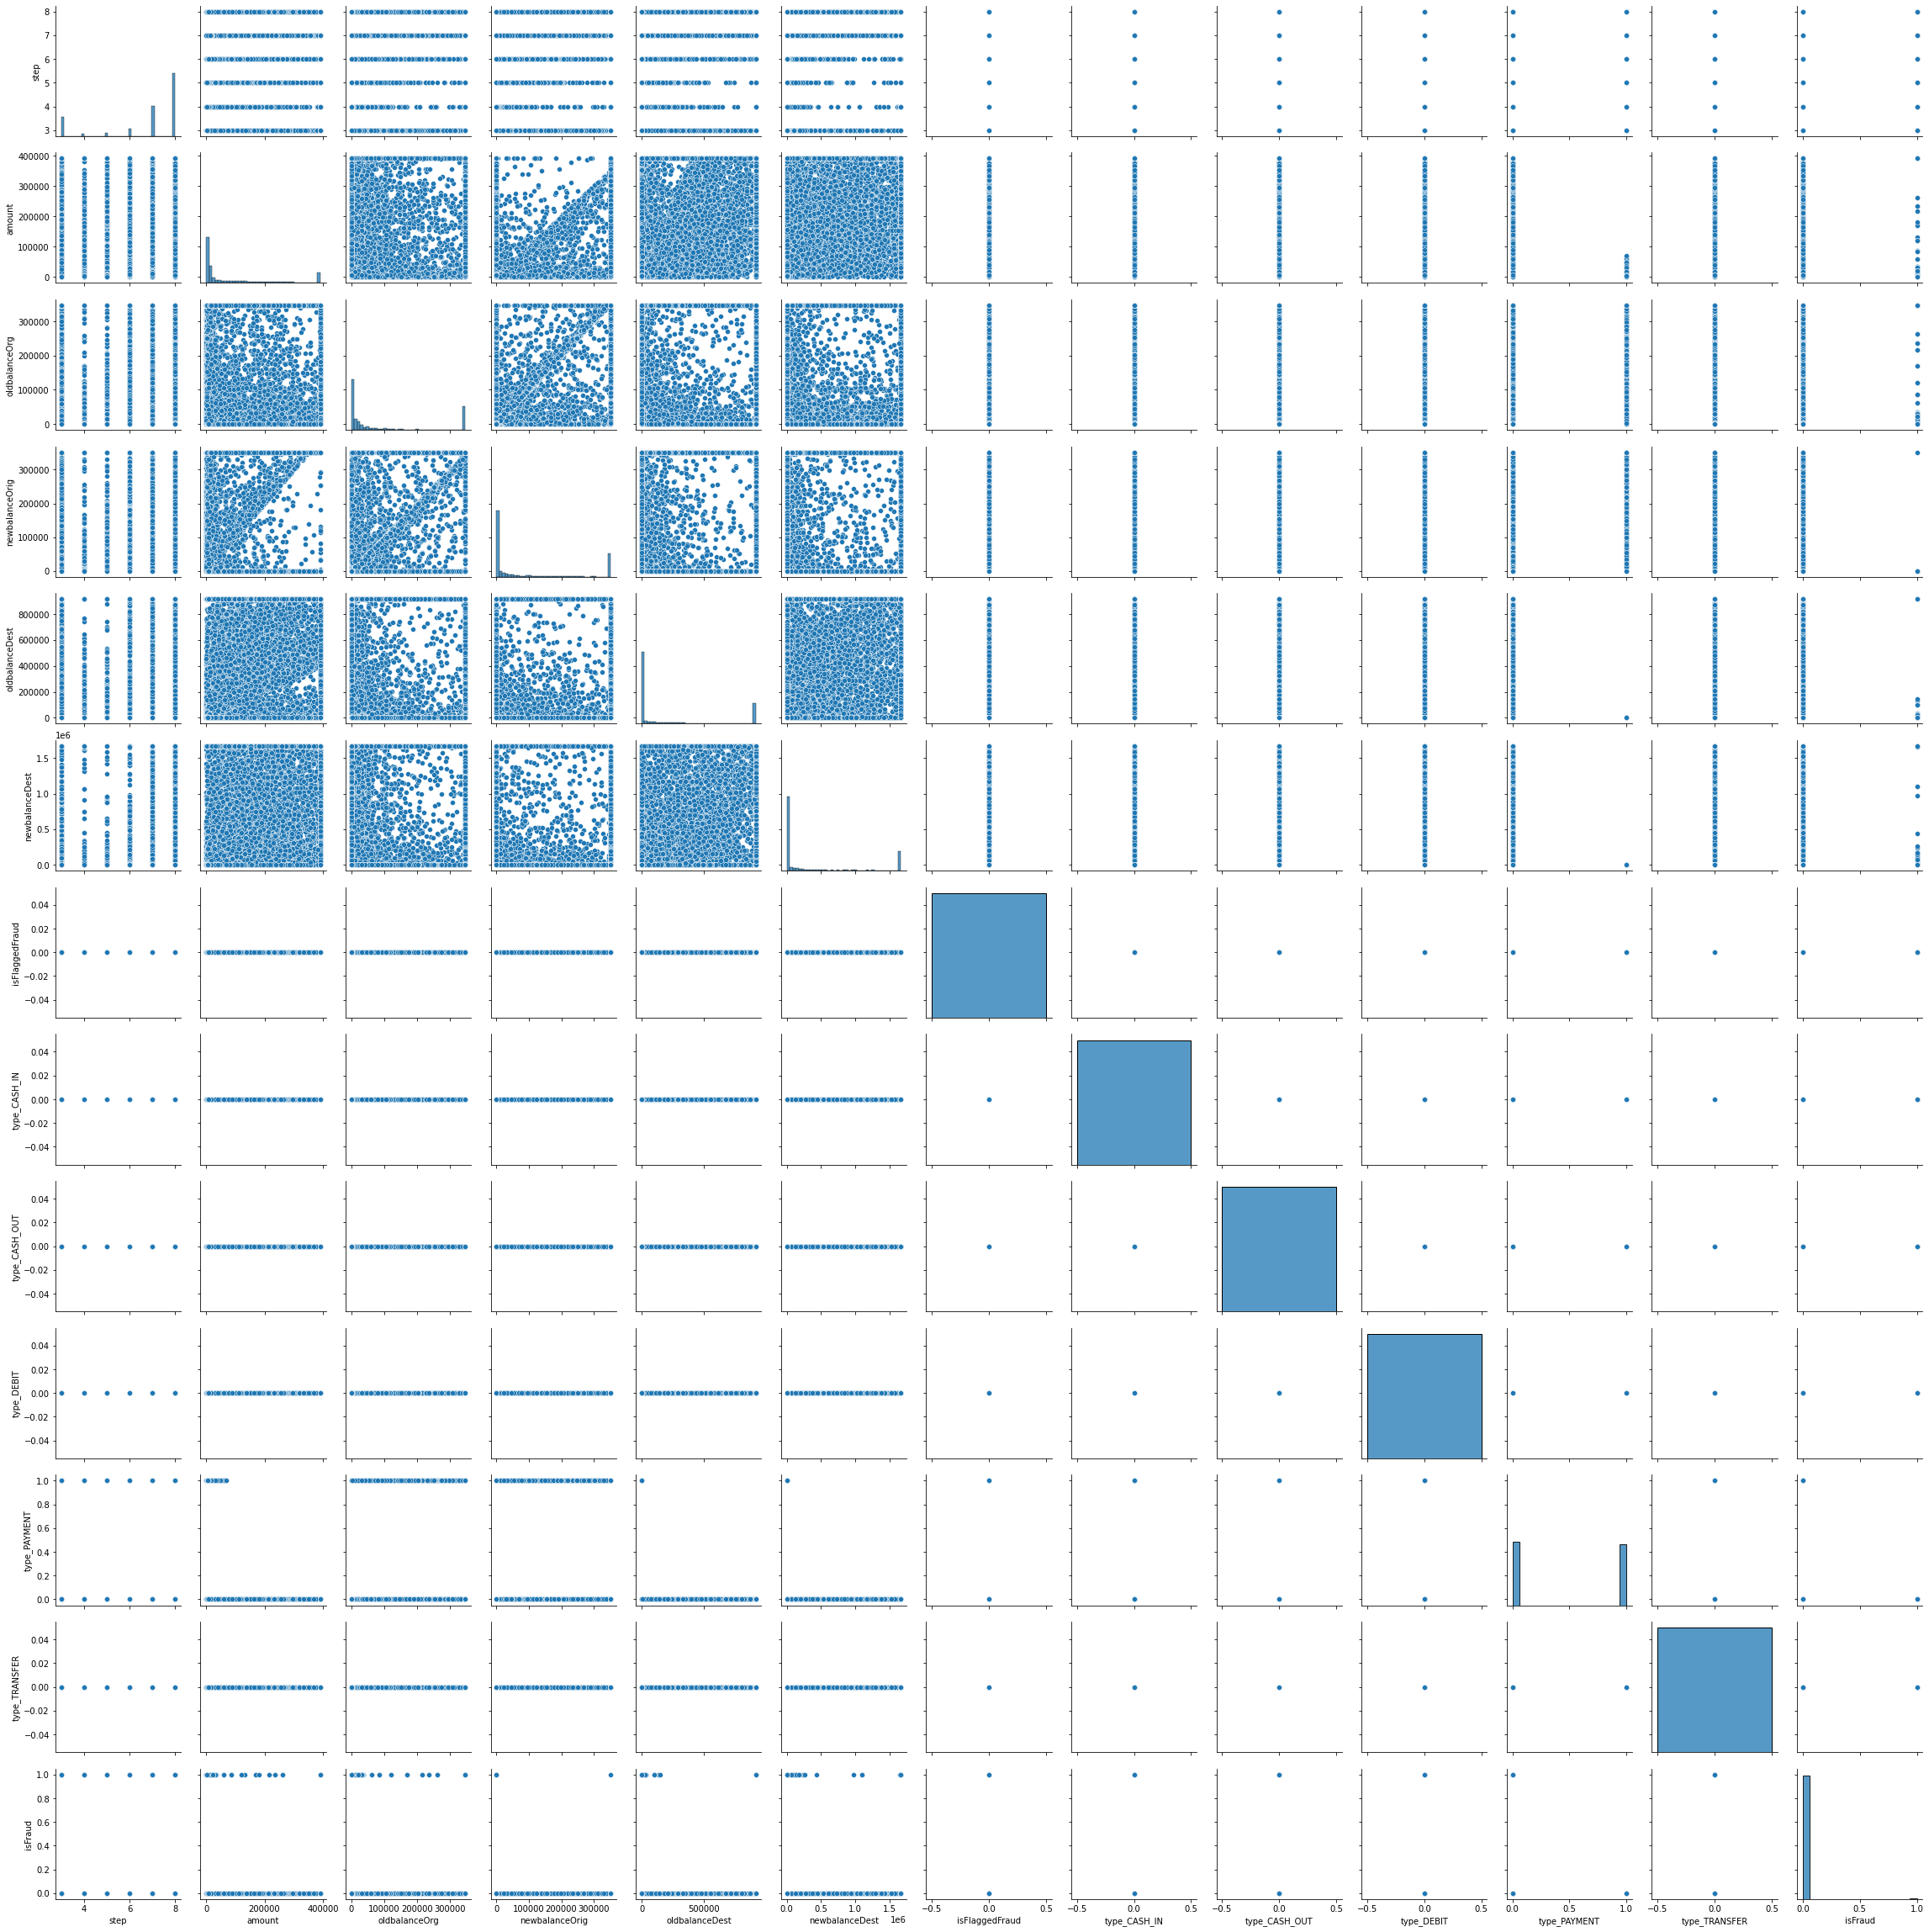

In [ ]:
sns.pairplot(samp)  #pairplot
plt.show()



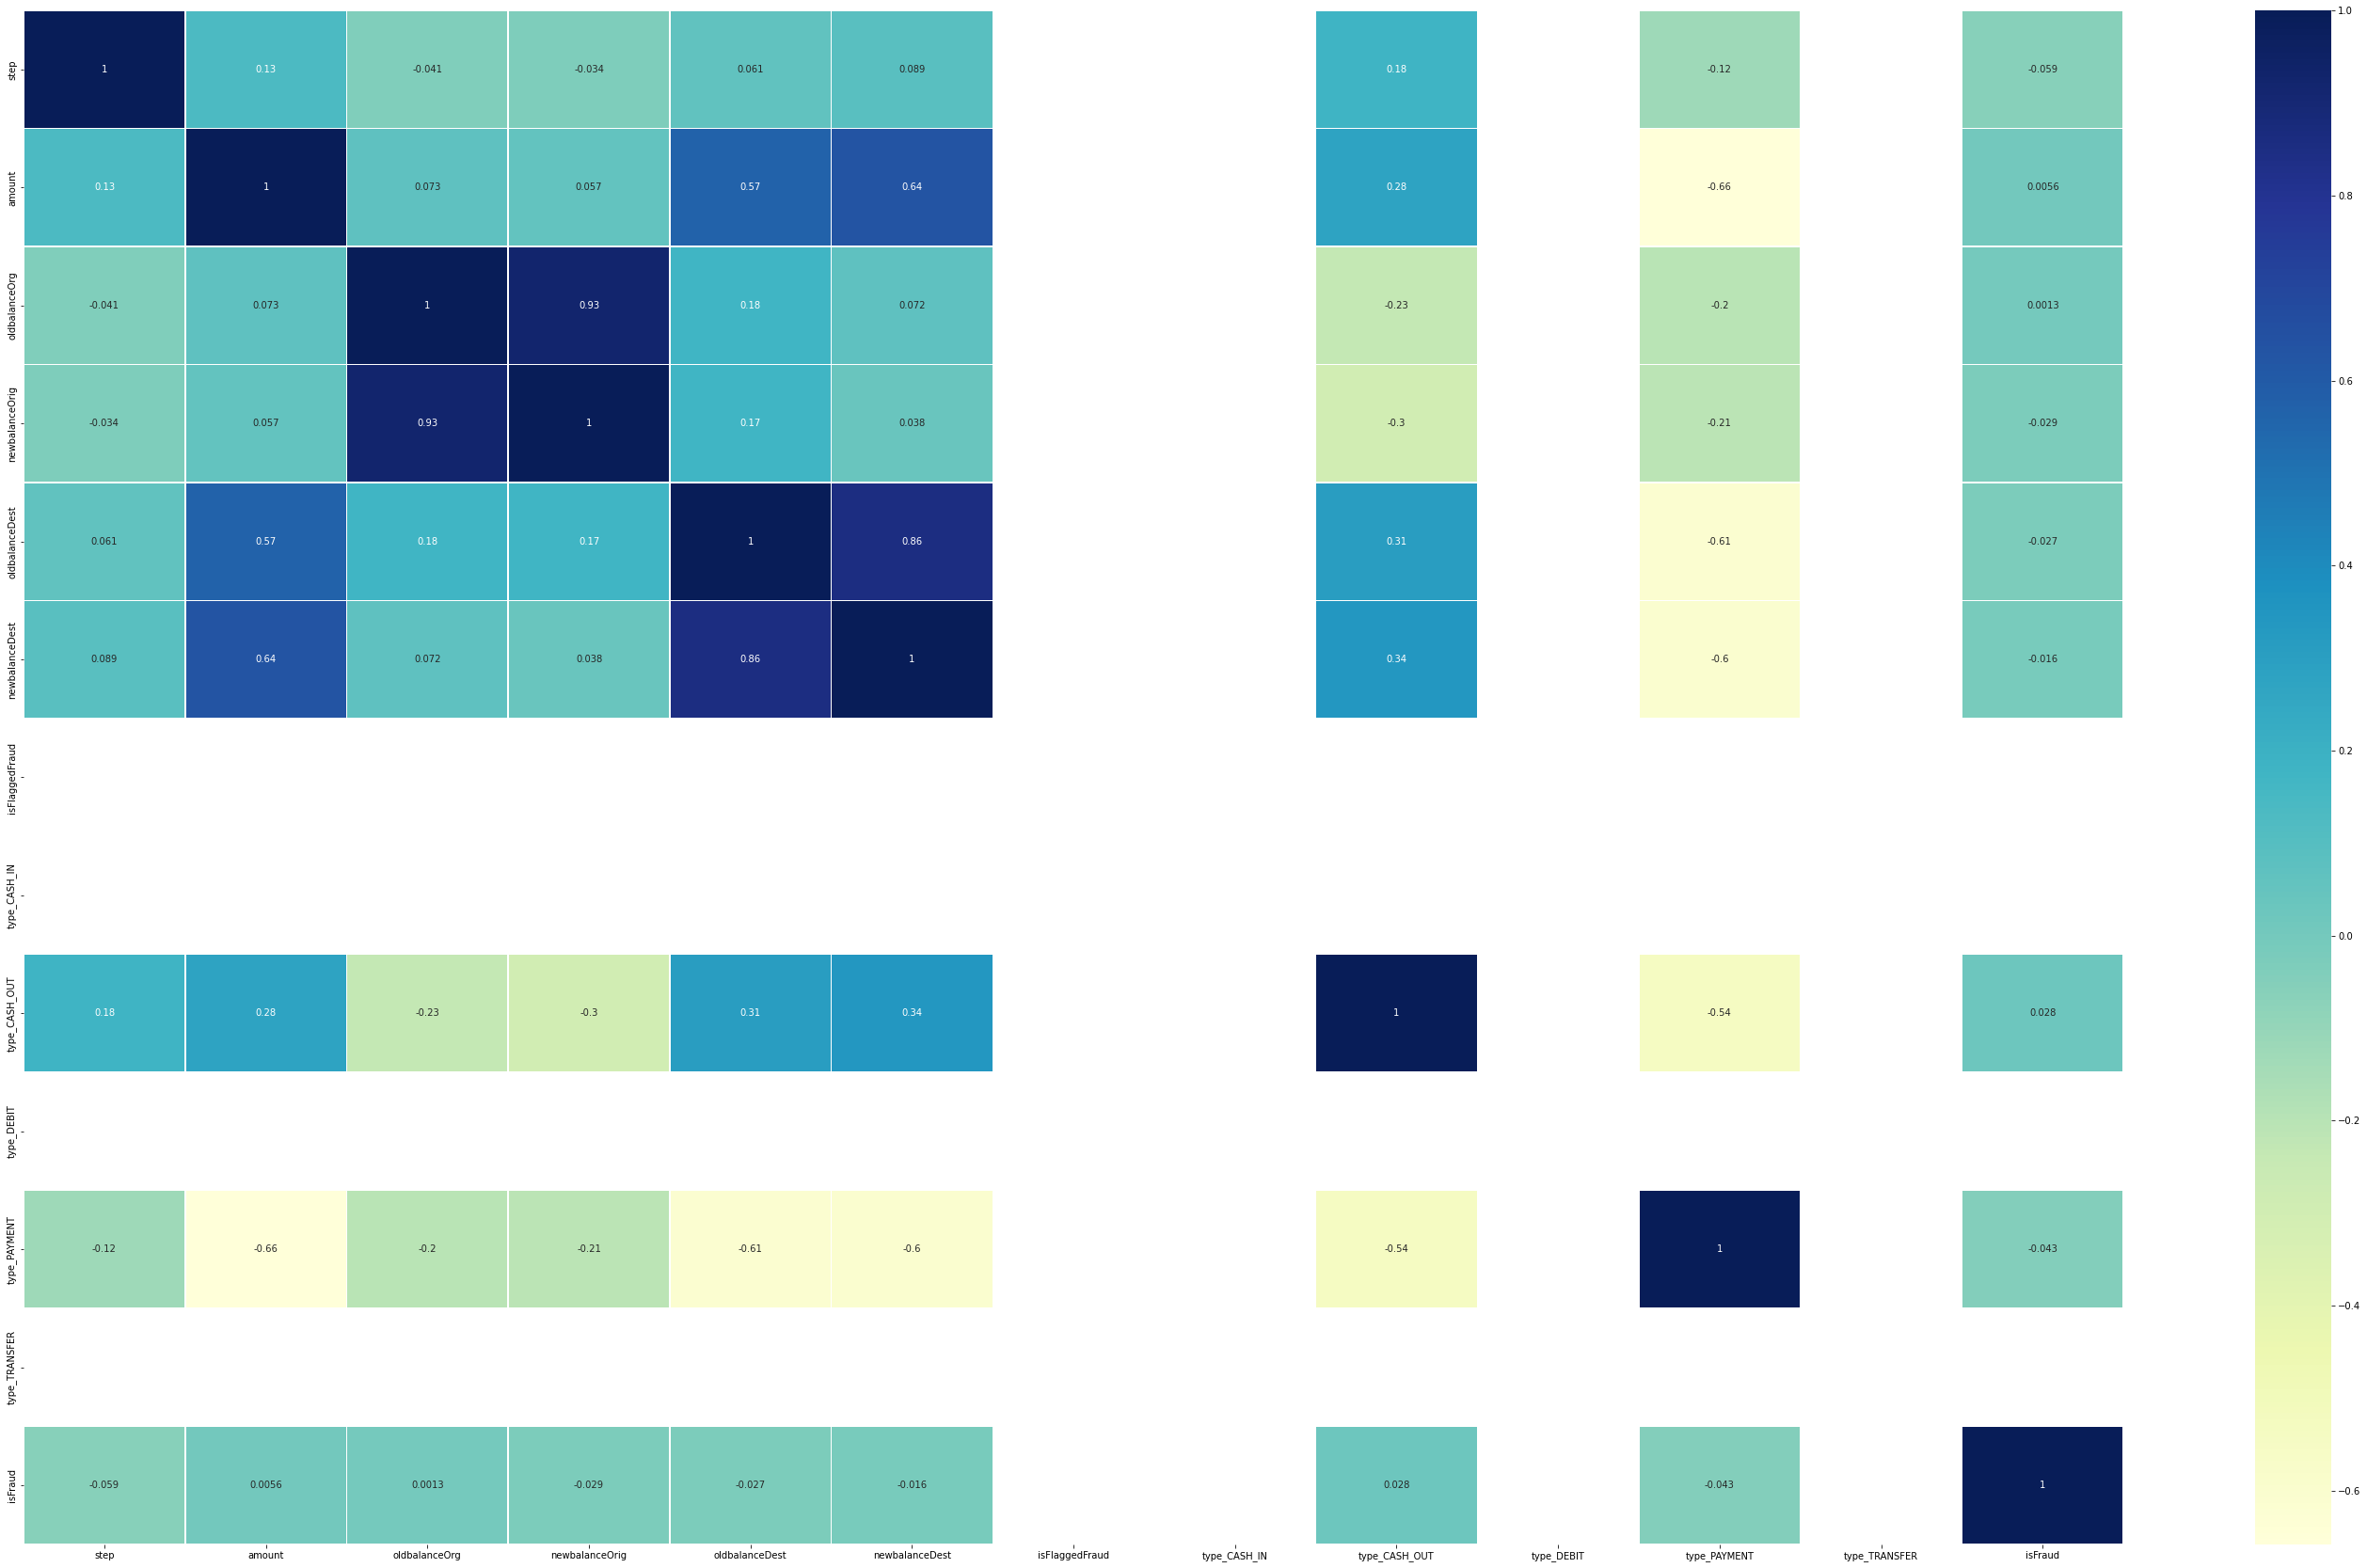

In [22]:

    

fig, ax = plt.subplots(figsize=(50,30)) 


sns.heatmap(samp.corr(method = "pearson"), annot = True, cmap="YlGnBu", linewidths=.5, ax=ax)

In [23]:
samp.drop(["isFlaggedFraud"], axis=1 , inplace=True)

In [24]:
X1 = samp.drop('isFraud',axis=1)

                                                                    
Y1 = samp['isFraud']

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X1,Y1,test_size=0.3,random_state=7)

In [26]:
## Import Libraries

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [27]:
model = KNeighborsClassifier()

##model.get_params()

In [28]:
## benchmark model


scale = MinMaxScaler()

train_scale = scale.fit_transform(X_train)
test_scale = scale.transform(X_test)

model.fit(train_scale, y_train)

y_pred = model.predict(test_scale)

print(accuracy_score(y_test, y_pred))


## Confusion Matrix

print(confusion_matrix(y_test, y_pred, labels = [0,1]))

print(classification_report(y_test, y_pred))

0.9988171279867518
[[12655     4]
 [   11    11]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     12659
         1.0       0.73      0.50      0.59        22

    accuracy                           1.00     12681
   macro avg       0.87      0.75      0.80     12681
weighted avg       1.00      1.00      1.00     12681



In [29]:
from sklearn.linear_model import LogisticRegression



In [30]:


##default solver method ('sag') ##scale data use sag and saga becouse of gd
logit_model = LogisticRegression()

logit_model.fit(train_scale, y_train)

y_pred = logit_model.predict(test_scale)

print(accuracy_score(y_test, y_pred))


## Confusion Matrix

print(confusion_matrix(y_test, y_pred, labels = [0,1]))

print(classification_report(y_test, y_pred))

0.998265121047236
[[12659     0]
 [   22     0]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     12659
         1.0       0.00      0.00      0.00        22

    accuracy                           1.00     12681
   macro avg       0.50      0.50      0.50     12681
weighted avg       1.00      1.00      1.00     12681



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [31]:
from sklearn.svm import SVC

In [32]:
## SVM with default kernel trick ('rbf')
svm_model = SVC()

svm_model.fit(train_scale, y_train)

y_pred = svm_model.predict(test_scale)

print(accuracy_score(y_test, y_pred))


## Confusion Matrix

print(confusion_matrix(y_test, y_pred, labels = [0,1]))

print(classification_report(y_test, y_pred))

0.998265121047236
[[12659     0]
 [   22     0]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     12659
         1.0       0.00      0.00      0.00        22

    accuracy                           1.00     12681
   macro avg       0.50      0.50      0.50     12681
weighted avg       1.00      1.00      1.00     12681



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [33]:
from sklearn.ensemble import RandomForestClassifier  


In [34]:
#Befor sampling method
classifier= RandomForestClassifier(n_estimators= 100, criterion="entropy")## no use scale data

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(accuracy_score(y_test, y_pred))


## Confusion Matrix

print(confusion_matrix(y_test, y_pred, labels = [0,1]))

print(classification_report(y_test, y_pred))

0.999132560523618
[[12659     0]
 [   11    11]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     12659
         1.0       1.00      0.50      0.67        22

    accuracy                           1.00     12681
   macro avg       1.00      0.75      0.83     12681
weighted avg       1.00      1.00      1.00     12681



In [35]:
from sklearn.model_selection import KFold

from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE

In [36]:
# over sampling method to reduce the insamble of the data
sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [37]:
print("Before overSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before overSampling, counts of label '0': {} \n".format(sum(y_train==0)))

Before overSampling, counts of label '1': 72
Before overSampling, counts of label '0': 29517 



In [38]:

print("After overSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After overSampling, counts of label '0': {} \n".format(sum(y_train_res==0)))

After overSampling, counts of label '1': 29517
After overSampling, counts of label '0': 29517 



In [39]:
# use sampling method
classifier.fit(X_train_res, y_train_res)

y_pred = classifier.predict(X_test)

print(accuracy_score(y_test, y_pred))


## Confusion Matrix

print(confusion_matrix(y_test, y_pred, labels = [0,1]))

print(classification_report(y_test, y_pred))


cv_score_11 = cross_val_score(classifier , X_train_res, y_train_res, scoring = 'recall_macro', 
                                          cv = KFold(n_splits = 10))

cv_score_11.mean()

0.999132560523618
[[12654     5]
 [    6    16]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     12659
         1.0       0.76      0.73      0.74        22

    accuracy                           1.00     12681
   macro avg       0.88      0.86      0.87     12681
weighted avg       1.00      1.00      1.00     12681



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



0.9109967705029863

In [40]:
from sklearn.model_selection import RandomizedSearchCV

In [41]:
# haper tunning parameter
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 20, num = 20)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)]
min_samples_split = [2, 6, 10]
min_samples_leaf = [1, 3, 4]
bootstrap = [True, False]


random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [42]:
# run randomized search

samples = 10                                                                              # number of random samples

randomCV = RandomizedSearchCV(classifier, 
                              param_distributions = random_grid, 
                              n_iter = samples, 
                              cv = 10)                                                    #default cv = 10

In [43]:
randomCV.fit(X_train_res, y_train_res)

 
print(randomCV.best_params_)

{'n_estimators': 14, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 70, 'bootstrap': False}


In [61]:
# use best parameter
final_rf = RandomForestClassifier(bootstrap = False, 
                                   
                                  max_depth = 70, 
                                  max_features ='sqrt', 
                                  min_samples_leaf = 1, 
                                  min_samples_split = 2,
                                  n_estimators=14)
final_rf.fit(X_train_res, y_train_res)

y_pred = final_rf.predict(X_test)

print(accuracy_score(y_test, y_pred))

## Confusion Matrix

print(confusion_matrix(y_test, y_pred, labels = [0,1]))

print(classification_report(y_test, y_pred))



0.9989748442551849
[[12654     5]
 [    8    14]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     12659
         1.0       0.74      0.64      0.68        22

    accuracy                           1.00     12681
   macro avg       0.87      0.82      0.84     12681
weighted avg       1.00      1.00      1.00     12681



In [45]:
# use cross validation for consistancy of model
final_rf.fit(X_train_res, y_train_res)

cv_score_rf = cross_val_score(final_rf , X_train_res, y_train_res, scoring = 'recall_macro', 
                                          cv = KFold(n_splits = 10))

In [46]:
cv_score_rf.mean()

0.9359579218029623

In [47]:
import xgboost as xgb

In [49]:
#Befor using sampling method
modelxg = xgb.XGBClassifier(random_state = 1)## scale data not use in trees

modelxg.fit(X_train, y_train)

y_pred = modelxg.predict(X_test)

print(accuracy_score(y_test, y_pred))

## Confusion Matrix

print(confusion_matrix(y_test, y_pred, labels = [0,1]))

print(classification_report(y_test, y_pred))


0.9993691349262677
[[12659     0]
 [    8    14]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     12659
         1.0       1.00      0.64      0.78        22

    accuracy                           1.00     12681
   macro avg       1.00      0.82      0.89     12681
weighted avg       1.00      1.00      1.00     12681



In [48]:
#Used sampling method
modelxg = xgb.XGBClassifier(random_state = 1)

modelxg.fit(X_train_res, y_train_res)

y_pred = modelxg.predict(X_test)

print(accuracy_score(y_test, y_pred))

## Confusion Matrix

print(confusion_matrix(y_test, y_pred, labels = [0,1]))

print(classification_report(y_test, y_pred))


0.9945587887390585
[[12593    66]
 [    3    19]]
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00     12659
         1.0       0.22      0.86      0.36        22

    accuracy                           0.99     12681
   macro avg       0.61      0.93      0.68     12681
weighted avg       1.00      0.99      1.00     12681



In [63]:
# Hypertunning parameter
learning_rate= [0.05,0.10,0.15,0.20,0.25,0.30]
max_depth=[ 3, 4, 5, 6, 8, 10, 12, 15]
min_child_weight=[ 1, 3, 5, 7 ]
gamma =[ 0.0, 0.1, 0.2 , 0.3, 0.4 ]
colsample_bytree=[ 0.3, 0.4, 0.5 , 0.7 ]
random_grid = {

 'learning_rate': learning_rate,

  'max_depth': max_depth,

  'min_child_weight': min_child_weight,

  'gamma': gamma,

   'colsample_bytree':colsample_bytree
}   

In [52]:
# run randomized search
samples = 10                                                                              # number of random samples

randomCV1 = RandomizedSearchCV(modelxg, 
                              param_distributions = random_grid, 
                              n_iter = samples, 
                              cv = 10)                                                    #default cv = 10

In [53]:

randomCV1.fit(X_train_res, y_train_res)

 
print(randomCV1.best_params_)

{'min_child_weight': 3, 'max_depth': 12, 'learning_rate': 0.15, 'gamma': 0.4, 'colsample_bytree': 0.7}


In [60]:
# used best parameter
final_xg = xgb.XGBClassifier(bootstrap = False, 
                                   
                                  max_depth = 12, 
                                  min_child_weight= 3 ,
                                  learning_rate=0.15 ,
                                  gamma= 0.4,
                                 colsample_bytree= 0.7)
final_xg.fit(X_train_res, y_train_res)

y_pred = final_xg.predict(X_test)

print(accuracy_score(y_test, y_pred))

## Confusion Matrix

print(confusion_matrix(y_test, y_pred, labels = [0,1]))

print(classification_report(y_test, y_pred))


0.9989748442551849
[[12652     7]
 [    6    16]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     12659
         1.0       0.70      0.73      0.71        22

    accuracy                           1.00     12681
   macro avg       0.85      0.86      0.86     12681
weighted avg       1.00      1.00      1.00     12681



In [58]:
#use cross validation for check consistancy of model

final_xg.fit(X_train_res, y_train_res)

cv_score_xg = cross_val_score(final_xg , X_train_res, y_train_res, scoring = 'recall_macro', 
                                          cv = KFold(n_splits = 10))


In [59]:
cv_score_xg.mean()

0.9686077533136246

In [62]:
# for compair Random Forest and xgboost model so xgboost gives batter result so we can usexgboost

In [ ]:
classifier.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}